# Wine Quality Prediction

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
wine=pd.read_csv("winequality.csv")
wine.sample(10)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
203             7.0              0.42         0.35             1.6      0.088   
650            10.7              0.43         0.39             2.2      0.106   
241            12.0              0.38         0.56             2.1      0.093   
689             8.1              0.38         0.48             1.8      0.157   
932             7.6              0.40         0.29             1.9      0.078   
1386            7.4              0.64         0.07             1.8      0.100   
939             6.2              0.46         0.17             1.6      0.073   
1212            6.8              0.65         0.02             2.1      0.078   
1228            5.1              0.42         0.00             1.8      0.044   
527             7.0              0.38         0.49             2.5      0.097   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
203                  16.0                  39.0  0.99610  3.34       0.55   
650                   8.0                  32.0  0.99860  2.89       0.50   
241                   6.0                  24.0  0.99925  3.14       0.71   
689                   5.0                  17.0  0.99760  3.30       1.05   
932                  29.0                  66.0  0.99710  3.45       0.59   
1386                  8.0                  23.0  0.99610  3.30       0.58   
939                   7.0                  11.0  0.99425  3.61       0.54   
1212                  8.0                  15.0  0.99498  3.35       0.62   
1228                 18.0                  88.0  0.99157  3.68       0.73   
527                  33.0                  85.0  0.99620  3.39       0.77   

      alcohol  quality  
203       9.2        5  
650       9.6        5  
241      10.9        6  
689       9.4        5  
932       9.5        6  
1386      9.6        5  
939      11.4        5  
1212     10.4        6  
1228     13.6        7  
527      11.4        6

In [4]:
wine.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [5]:
wine.shape

(1599, 12)

In [6]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
wine.corr()

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.256131     0.671703   
volatile acidity          -0.256131          1.000000    -0.552496   
citric acid                0.671703         -0.552496     1.000000   
residual sugar             0.114777          0.001918     0.143577   
chlorides                  0.093705          0.061298     0.203823   
free sulfur dioxide       -0.153794         -0.010504    -0.060978   
total sulfur dioxide      -0.113181          0.076470     0.035533   
density                    0.668047          0.022026     0.364947   
pH                        -0.682978          0.234937    -0.541904   
sulphates                  0.183006         -0.260987     0.312770   
alcohol                   -0.061668         -0.202288     0.109903   
quality                    0.124052         -0.390558     0.226373   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.114777   0.093705            -0.153794   
volatile acidity            0.001918   0.061298            -0.010504   
citric acid                 0.143577   0.203823            -0.060978   
residual sugar              1.000000   0.055610             0.187049   
chlorides                   0.055610   1.000000             0.005562   
free sulfur dioxide         0.187049   0.005562             1.000000   
total sulfur dioxide        0.203028   0.047400             0.667666   
density                     0.355283   0.200632            -0.021946   
pH                         -0.085652  -0.265026             0.070377   
sulphates                   0.005527   0.371260             0.051658   
alcohol                     0.042075  -0.221141            -0.069408   
quality                     0.013732  -0.128907            -0.050656   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.113181  0.668047 -0.682978   0.183006   
volatile acidity                  0.076470  0.022026  0.234937  -0.260987   
citric acid                       0.035533  0.364947 -0.541904   0.312770   
residual sugar                    0.203028  0.355283 -0.085652   0.005527   
chlorides                         0.047400  0.200632 -0.265026   0.371260   
free sulfur dioxide               0.667666 -0.021946  0.070377   0.051658   
total sulfur dioxide              1.000000  0.071269 -0.066495   0.042947   
density                           0.071269  1.000000 -0.341699   0.148506   
pH                               -0.066495 -0.341699  1.000000  -0.196648   
sulphates                         0.042947  0.148506 -0.196648   1.000000   
alcohol                          -0.205654 -0.496180  0.205633   0.093595   
quality                          -0.185100 -0.174919 -0.057731   0.251397   

                       alcohol   quality  
fixed acidity        -0.061668  0.124052  
volatile acidity     -0.202288 -0.390558  
citric acid           0.109903  0.226373  
residual sugar        0.042075  0.013732  
chlorides            -0.221141 -0.128907  
free sulfur dioxide  -0.069408 -0.050656  
total sulfur dioxide -0.205654 -0.185100  
density              -0.496180 -0.174919  
pH                    0.205633 -0.057731  
sulphates             0.093595  0.251397  
alcohol               1.000000  0.476166  
quality               0.476166  1.000000

In [8]:
wine.groupby("quality").mean()

fixed acidity  volatile acidity  citric acid  residual sugar  \
quality                                                                 
3             8.360000          0.884500     0.171000        2.635000   
4             7.779245          0.693962     0.174151        2.694340   
5             8.167254          0.577041     0.243686        2.528855   
6             8.347179          0.497484     0.273824        2.477194   
7             8.872362          0.403920     0.375176        2.720603   
8             8.566667          0.423333     0.391111        2.577778   

         chlorides  free sulfur dioxide  total sulfur dioxide   density  \
quality                                                                   
3         0.122500            11.000000             24.900000  0.997464   
4         0.090679            12.264151             36.245283  0.996542   
5         0.092736            16.983847             56.513950  0.997104   
6         0.084956            15.711599             40.869906  0.996615   
7         0.076588            14.045226             35.020101  0.996104   
8         0.068444            13.277778             33.444444  0.995212   

               pH  sulphates    alcohol  
quality                                  
3        3.398000   0.570000   9.955000  
4        3.381509   0.596415  10.265094  
5        3.304949   0.620969   9.899706  
6        3.318072   0.675329  10.629519  
7        3.290754   0.741256  11.465913  
8        3.267222   0.767778  12.094444

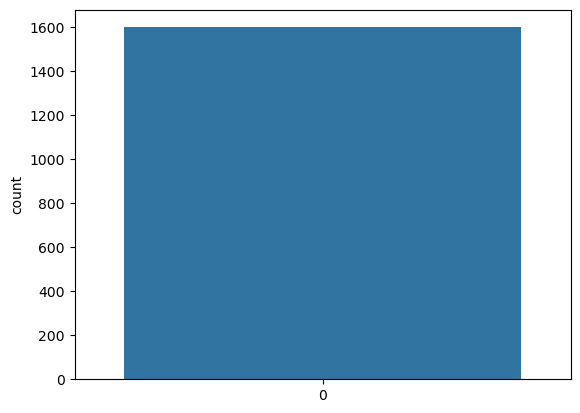

In [9]:
sns.countplot(wine["quality"])
plt.show()

c:\Users\msvar\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


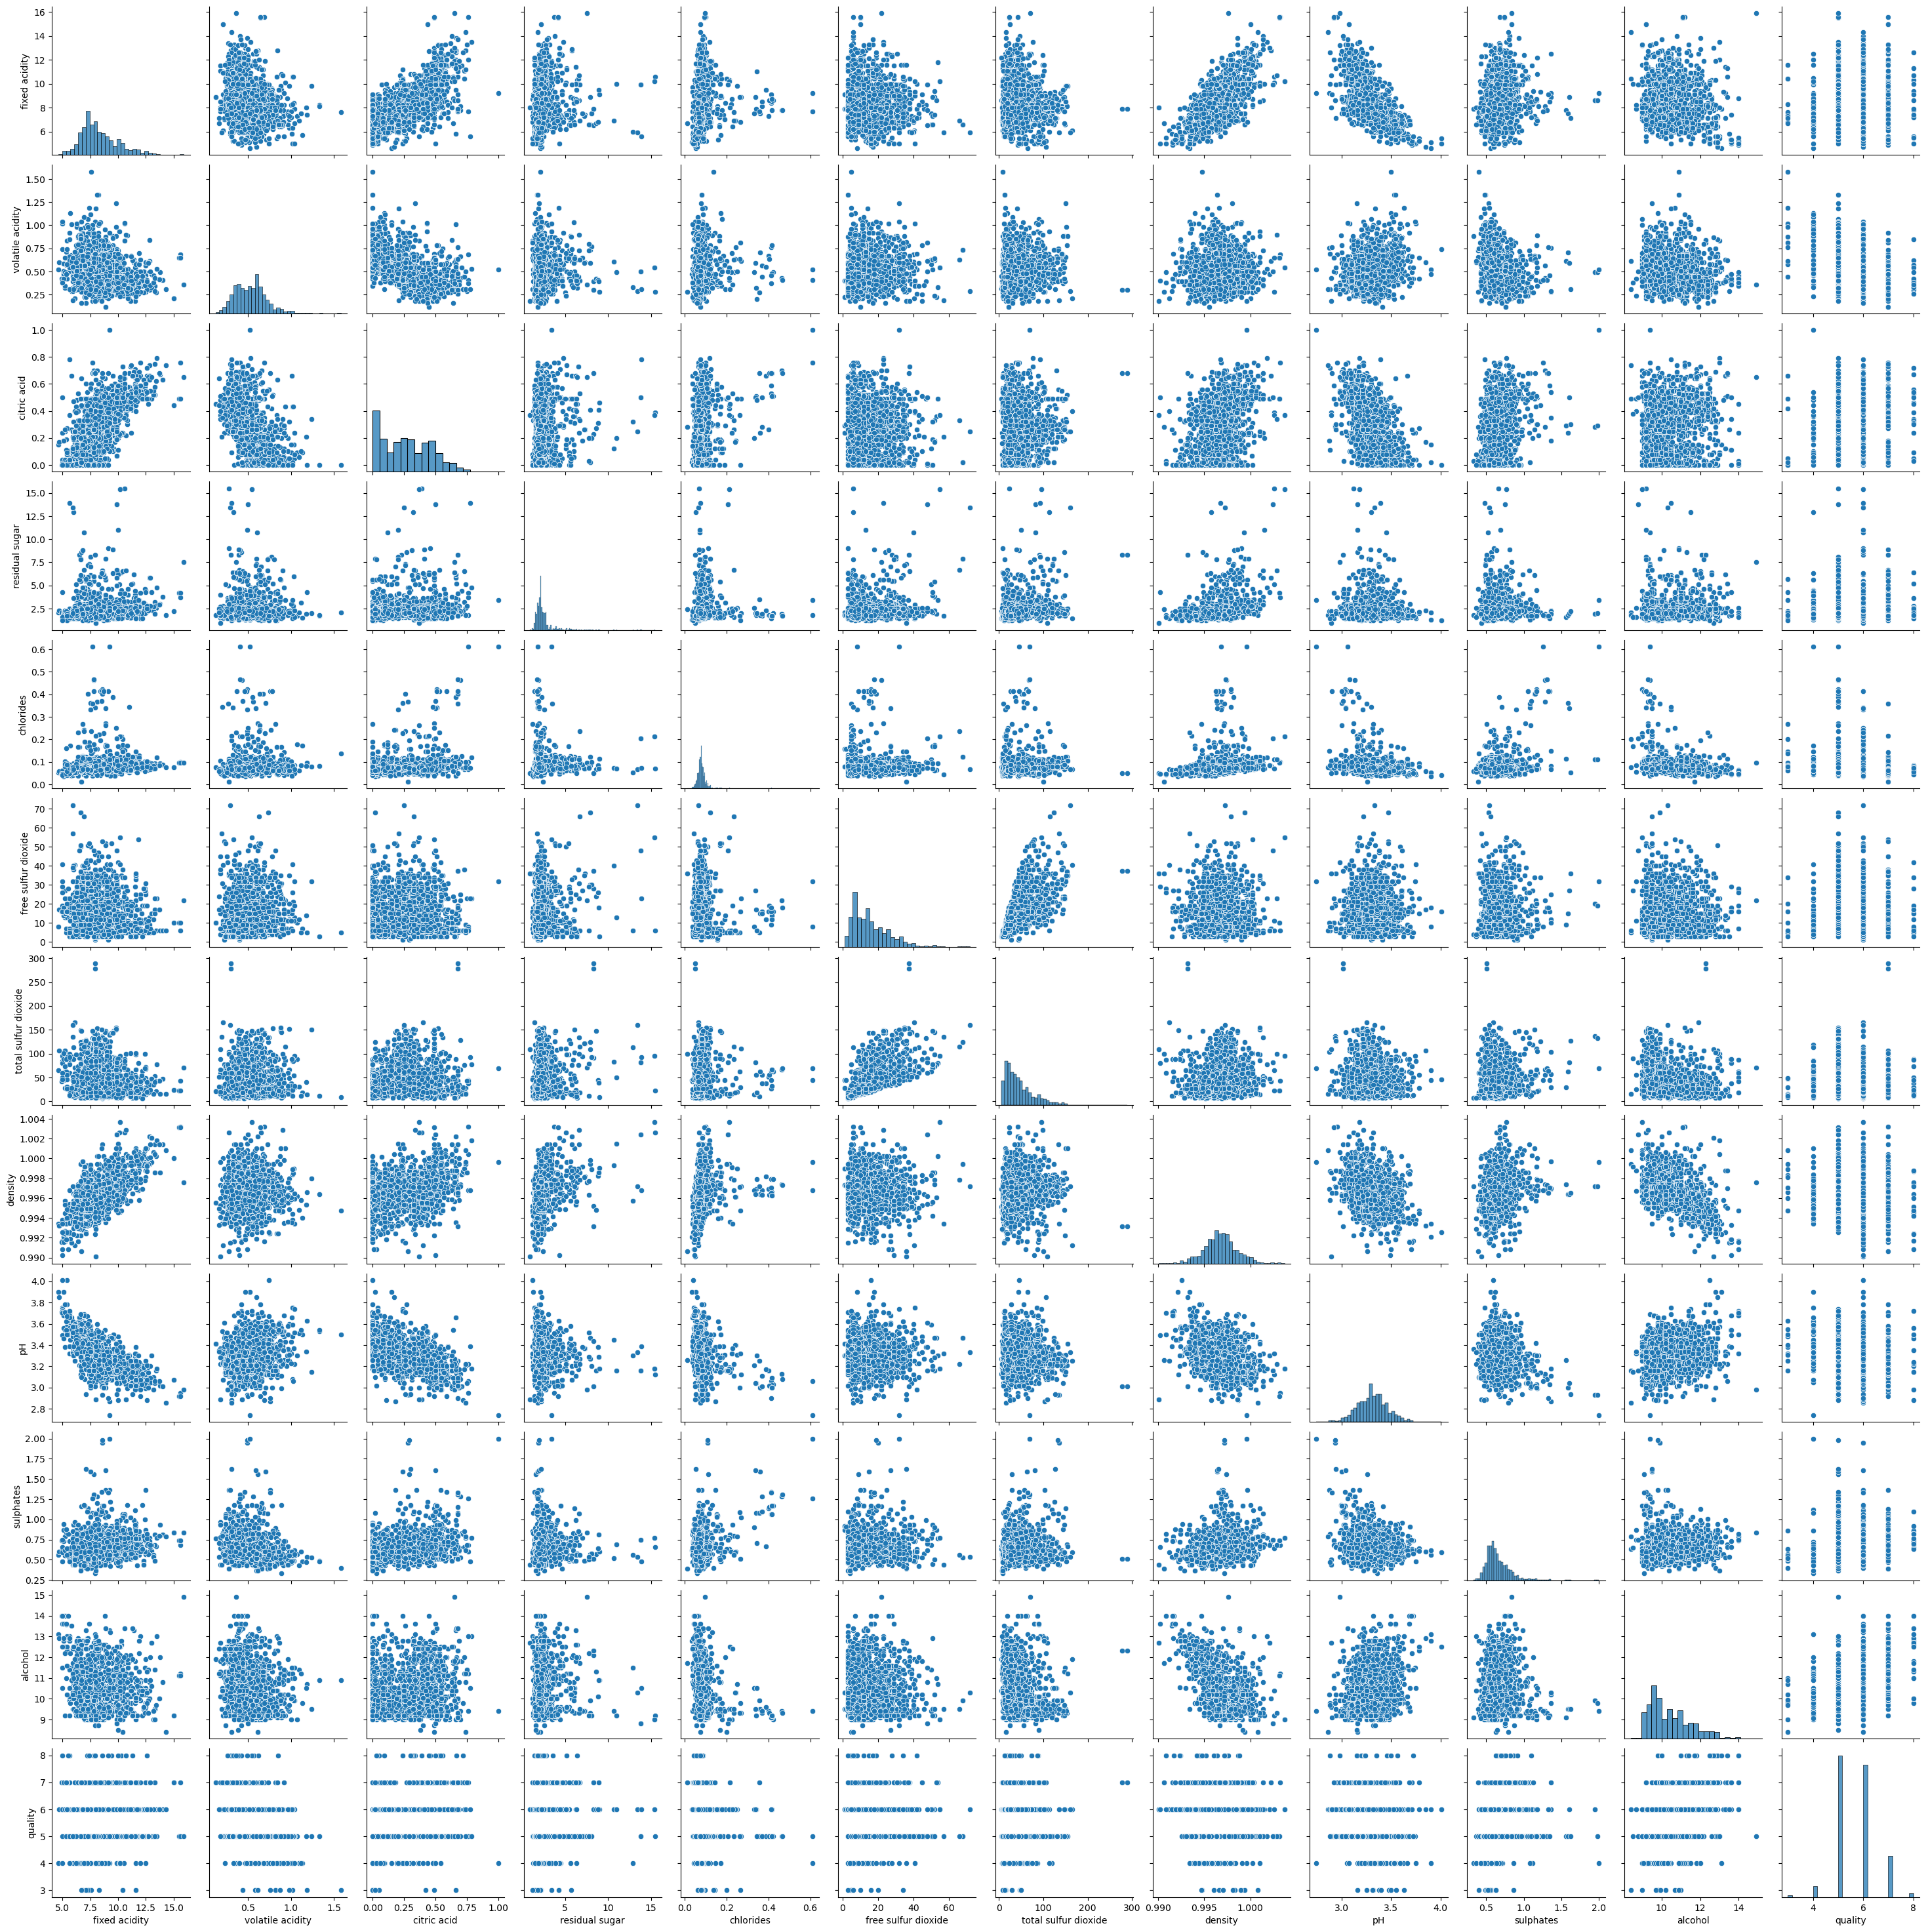

In [13]:
sns.pairplot(wine)
plt.show()

<Axes: xlabel='quality', ylabel='alcohol'>

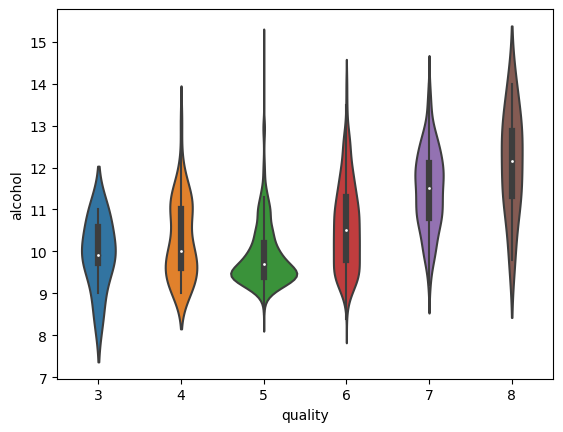

In [14]:
sns.violinplot(x='quality', y='alcohol', data=wine)

<Axes: >

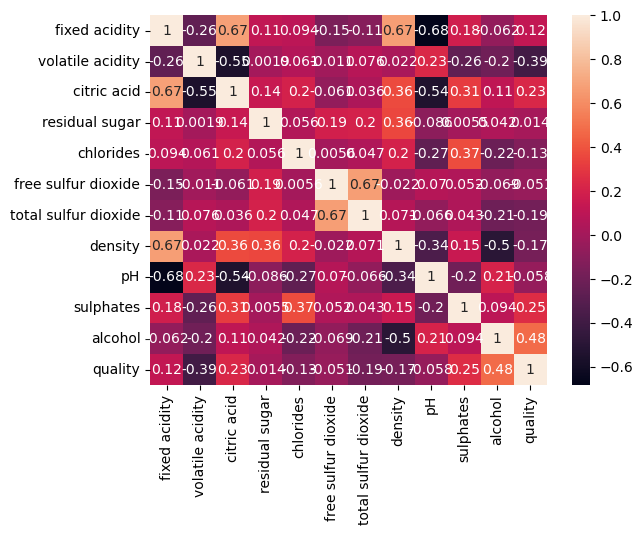

In [15]:
corr = wine.corr()
sns.heatmap(corr,annot=True)

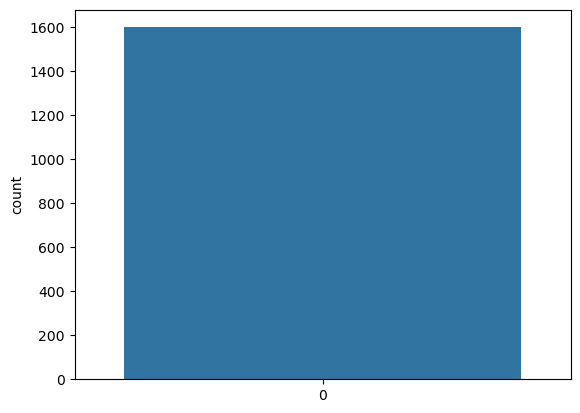

In [16]:
sns.countplot(wine['alcohol'])
plt.show()

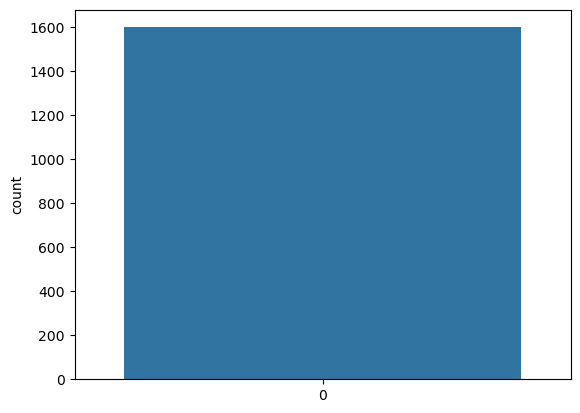

In [17]:
sns.countplot(wine['pH'])
plt.show()

In [18]:
wine["good_quality"]=[1 if x>=6 else 0 for x in wine["quality"]]

In [19]:
wine

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  good_quality  
0         9.4        5             0  
1         9.8        5             0  
2         9.8        5             0  
3         9.8        6             1  
4         9.4        5             0  
...       ...      ...           ...  
1594     10.5        5             0  
1595     11.2        6             1  
1596     11.0        6             1  
1597     10.2        5             0  
1598     11.0        6             1  

[1599 rows x 13 columns]

In [20]:
X = wine.drop(['quality','good_quality'], axis = 1)
Y = wine['good_quality']

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y)

In [22]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs', max_iter=1000)
model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score,confusion_matrix
print("Accuracy Score:",accuracy_score(Y_test,Y_pred))

Accuracy Score: 0.7025


In [24]:
confusion_mat = confusion_matrix(Y_test,Y_pred)
print(confusion_mat)

[[140  65]
 [ 54 141]]
